# FB 08 - F-Praktikum Physik Materialien - 57 Magnetic Resonance

## Fourier Transform and its application in NMR

In this section, the basics of the Fourier Transform (FT) are introduced with simple words. For more detailed descriptions, please check this nice book with animations https://www.cis.rit.edu/htbooks/nmr/chap-5/chap-5.htm#5.3 .

### Bridge between domains

We are used to the time domain. 
When looking at a signal, we often plot its amplitude over time. In Fig.(50Hz-example)(a), we show a sine-wave signal which can be described by 

$s(t) = \sin(2\pi\times50\,t + \frac{\pi}{4})\,.$

However, when dealing with periodic signals (which is very frequent in NMR/MRI experiments), it is easier if we view signals in the **frequency domain**. 

What is frequency domain? Since we know in time domain we plot "signal amplitudes at different times", then we can infer that, in frequency domain we plot "signal amplitudes at different frequencies". For the signal we show above, it would be simply described as a 50-Hz signal with initial phase $\pi/4$ in the frequency domain [see Fig.(50Hz-example)(b)]. 

How could we know the frequencies of a time-domain signal if the signal is not trivial as the 50-Hz example? We apply the Fourier transform. Fourier transform bridges two domains. 

**Figure: 50Hz-example**

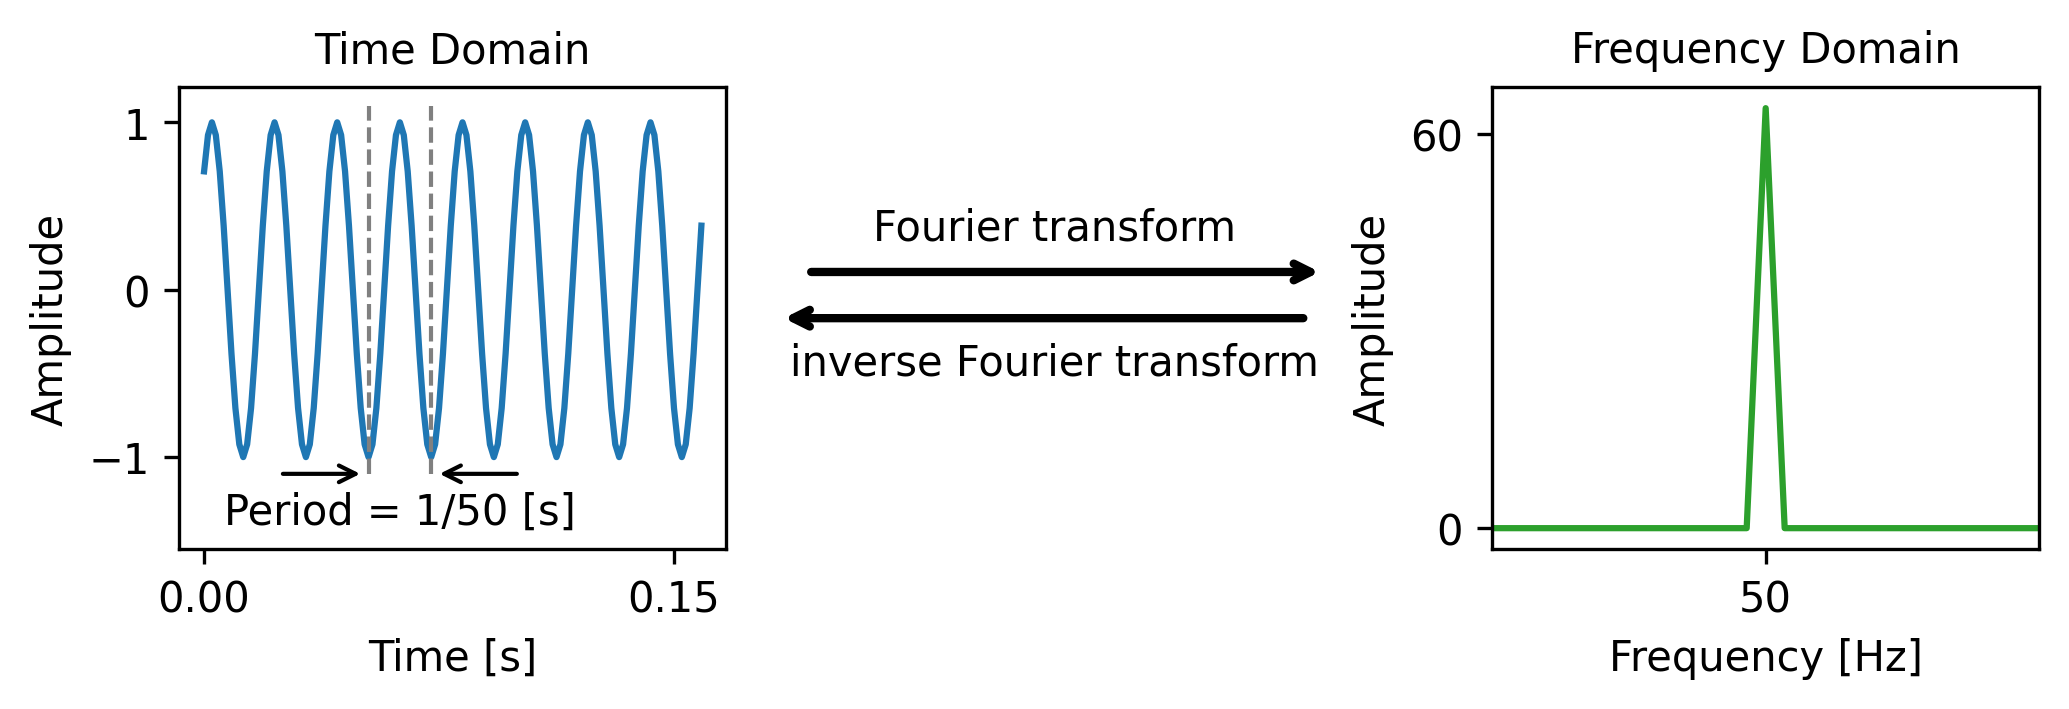

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Time-domain parameters
DW = 1/800  # dwell time
SI = 128 # size i.e. number of sampled points
timeStamp = DW * np.arange(SI)
s_t = np.sin(2 * np.pi * 50 * timeStamp + np.pi / 4)

# Frequency-domain computation
n = len(s_t)
frequencies = np.fft.fftfreq(n, d=DW)
fft_vals = np.fft.fft(s_t)
fft_vals_shifted = np.fft.fftshift(fft_vals)
frequencies_shifted = np.fft.fftshift(frequencies)

amplitude = np.abs(fft_vals_shifted)
phase = np.angle(fft_vals_shifted)

# Plotting setup
plt.rc("font", size=10)  # font size for all figures
plt.rc("figure", titlesize=10)  # Figure title
plt.rc("axes", titlesize=10)  # Axes title

fig = plt.figure(figsize=(8, 2), dpi=300)  # initialize a figure
gs = gridspec.GridSpec(nrows=1, ncols=3)  # create grid for multiple figures

ax00 = fig.add_subplot(gs[0, 0])
ax01 = fig.add_subplot(gs[0, 1]) 
ax02 = fig.add_subplot(gs[0, 2]) 
axs = [ax00, ax01, ax02]

# --- Left plot: Time-domain signal ---
axs[0].plot(timeStamp, s_t, color="tab:blue")

period = 1/ 50
arrow_left = (2 * np.pi * 2 + 1.25 * np.pi) / (2 * np.pi * 50)
arrow_right = (2 * np.pi * 2 + 3.25 * np.pi) / (2 * np.pi * 50)


axs[0].vlines(x=arrow_left, ymin=-1.1, ymax=1.1, color="grey", linestyle="--", linewidth=1)
axs[0].vlines(x=arrow_right, ymin=-1.1, ymax=1.1, color="grey", linestyle="--", linewidth=1)

axs[0].annotate(
    "",
    xy=(arrow_left, -1.1),
    xytext=(arrow_left - 0.03, -1.1),
    arrowprops=dict(arrowstyle="->", lw=1),
)
axs[0].annotate(
    "",
    xy=(arrow_right, -1.1),
    xytext=(arrow_right + 0.03, -1.1),
    arrowprops=dict(arrowstyle="->", lw=1),
)
axs[0].text(
    (arrow_left + arrow_right)/2, -1.2, "Period = 1/50 [s]", ha="center", va="top"
)


axs[0].set_xticks([0, 0.15])
axs[0].set_yticks([-1, 0, 1])
axs[0].set_title("Time Domain")
axs[0].set_xlabel("Time [s]")
axs[0].set_ylabel("Amplitude")
axs[0].set_ylim(bottom=-1.55)

# --- Middle plot: Arrow with transform labels ---
axs[1].axis("off")
axs[1].annotate(
    "", xy=(0.9, 0.6), xytext=(-0.06, 0.6), arrowprops=dict(arrowstyle="->", lw=2)
)
axs[1].annotate(
    "", xy=(0.87, 0.5), xytext=(-0.11, 0.5), arrowprops=dict(arrowstyle="<-", lw=2)
)
axs[1].text(0.4, 0.65, "Fourier transform", ha="center", va="bottom")
axs[1].text(0.4, 0.45, "inverse Fourier transform", ha="center", va="top")

# --- Right plot: Frequency-domain representation ---
# axs[2].scatter(
#     frequencies_shifted,
#     amplitude,
#     marker="x",
#     color='tab:green',
#     label="Amplitude",
# )
axs[2].plot(
    frequencies_shifted,
    amplitude,
    # marker="x",
    color="tab:green",
    label="Amplitude",
)
axs[2].set_xticks([50])
axs[2].set_yticks([0,60])
axs[2].set_xlim(-40, 140)
axs[2].set_xlabel("Frequency [Hz]")
axs[2].set_ylabel("Amplitude")
axs[2].set_title("Frequency Domain")

# # Add phase on a twin y-axis
# ax2 = axs[2].twinx()
# ax2.plot(frequencies_shifted, phase, "r--", label="Phase")
# ax2.set_ylabel("Phase [rad]", color="red")
# ax2.tick_params(axis="y", labelcolor="red")

plt.show()


### Parameters

### Fourier transform in a digital and discrete world

# 1) Fourier Series
**Fourier Theorem: (Synthesis equation)**



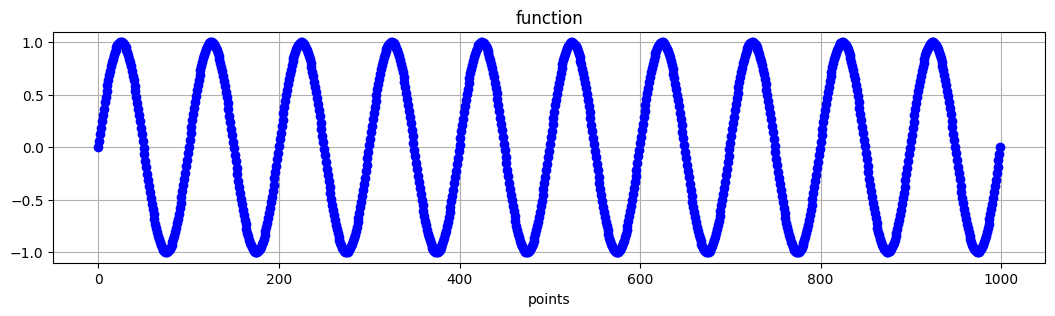

In [ ]:

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=(12.8,3)
import numpy as np

#input parameters
points=1000      #number of points
width = 10      #width of function
offset =0        #offset from center

#define Heaviside function
f = np.zeros(points)  
w=int(points/2-width/2+offset)   #set function in center with value =1 for width points
f[w:w+int(width)-1]=1
timeStamp=np.linspace(0,np.pi*2,points)
f=np.sin(width*(timeStamp-offset))
#plot
plt.plot(f,'bo-')
plt.xlabel("points")
plt.title('function')
plt.grid(True)
plt.show()

We now define a linear axis $t$ of length $points$ but running from $-period/2 = -T/2 = -\pi$ to $period/2 = T/2 = \pi$.<br>
Then the Fourier coefficients $a_n$ and $b_n$ are calculated and summed up to represend the function $f$.<br>

**TASK**
1) vary $n$ (modify the $show$-parameter accordingly
2) change the input function 

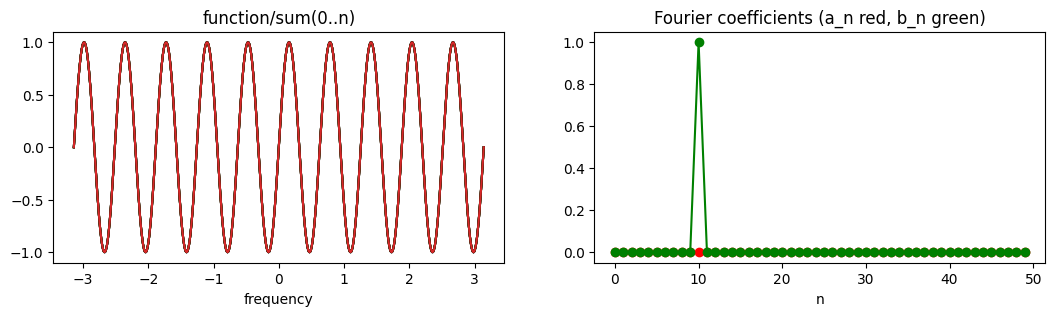

In [ ]:
T=2*np.pi
timeStamp=np.linspace(-T/2,T/2,points)

n=50   #number of coefficients used
show=10  #plot every showth plot of them

a=np.zeros(n)
b=np.zeros(n)
a[0]=2/points*np.sum(f)
SR=a[0]/2
figure, (ax1,ax2) = plt.subplots(1,2) 
for i in range(1,n):
    a[i]=2/points*np.sum(f*np.cos(i*timeStamp))
    b[i]=2/points*np.sum(f*np.sin(i*timeStamp))
    SR=SR+a[i]*np.cos(i*timeStamp)+b[i]*np.sin(i*timeStamp)
    if i%show ==0:
        ax1.plot(timeStamp,f,'k')
        ax1.plot(timeStamp,SR)
        ax1.set(xlabel='frequency')
        ax1.set_title('function/sum(0..n)')
        plt.show
ax2.plot(a,'ro-')
ax2.plot(b,'go-')
ax2.set(xlabel='n')
ax2.set_title('Fourier coefficients (a_n red, b_n green)')
plt.show()

It is convenient to express the Fourier-coefficients $a_n$ and $b_n$ in **complex notation**:<br>
\begin{equation}
f(t) = \sum\limits_{n=-\infty}^{\infty} c_n \exp\left(i\omega n\;t\right)   
\end{equation}
\begin{equation}
\text{with} \quad \sin(nt) = \frac{1}{2i} \left[e^{+int}-e^{-int} \right] \quad \text{and} \quad \cos(nt) = \frac{1}{2} \left[e^{+int}+e^{-int} \right]
\end{equation}
\begin{equation}
\text{hence:} \quad c_n = \frac{1}{2} \left(a_n - ib_n\right) = \frac{1}{T} \int\limits_{-T/2}^{T/2} f(t)\exp\left(-in\omega\;t\right)
\end{equation}

**where $n$ can be positive, negative and zero!**

